# **Random Forest - <font color='gold'>Conceitos e Fundamentos</font>**

## 🌲 **O que é?**


Random Forest é um algoritmo de aprendizado de máquina supervisionado baseado em ensemble de árvores de decisão. Ele combina várias árvores para melhorar a precisão, robustez e generalização do modelo.

## 🔧 **Como funciona?**

1. **Bootstraping (Bagging):**
   Cada árvore é treinada em uma **amostra aleatória com reposição** do conjunto de dados original.

2. **Seleção aleatória de atributos:**
   Ao construir uma árvore, a cada divisão do nó, o algoritmo considera **apenas um subconjunto aleatório de atributos**, reduzindo a correlação entre as árvores.

3. **Votação ou média:**

   * **Classificação:** a classe final é decidida por **votação da maioria** entre as árvores.
   * **Regressão:** a saída final é a **média** das previsões das árvores.

## ✅ **Vantagens**

* **Alta acurácia** mesmo com poucos ajustes de parâmetros.
* **Resistente ao overfitting** (comparado a uma única árvore).
* **Funciona bem com dados desbalanceados** e com **valores ausentes**.
* **Importância de atributos:** pode avaliar a relevância de cada variável.

## ⚠️ **Desvantagens**

* **Menos interpretável** que uma única árvore de decisão.
* **Mais lento** para predições e uso de memória (devido a várias árvores).
* Pode não performar tão bem em **problemas com dados muito esparsos** (ex: texto).

## 📌 **Principais Hiperparâmetros**

* `n_estimators`: número de árvores na floresta.
* `max_depth`: profundidade máxima de cada árvore.
* `max_features`: número máximo de atributos considerados por divisão.
* `min_samples_split`: número mínimo de amostras para dividir um nó.

## 📈 **Aplicações comuns**

* Diagnóstico médico
* Detecção de fraudes
* Classificação de imagens e textos
* Análise de sentimentos
* Modelos de crédito

# **Random Forest - <font color='gold'>Algoritmo</font>**

## **Importando as bibliotecas**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pandas as pd

## **Criando e separando as amostras de treino e teste**

In [ ]:
def split_manual(X, y, classes, n_train, n_test):

    """
    Divide X e y manualmente, garantindo n_train e n_test por classe.
    """
    X_train, y_train, X_test, y_test = [], [], [], []

    for cls in classes:
        idx = np.where(y == cls)[0]
        np.random.shuffle(idx)
        train_idx = idx[:n_train]
        test_idx = idx[n_train:n_train + n_test]

        X_train.append(X[train_idx])
        y_train.append(y[train_idx])
        X_test.append(X[test_idx])
        y_test.append(y[test_idx])

    return (
        np.vstack(X_train), np.concatenate(y_train),
        np.vstack(X_test), np.concatenate(y_test)
    )

## **Criando as árvores e treinando o(s) modelo(s)**

In [ ]:
def avaliar_modelos(X_train, X_test, y_train, y_test, titulo):

    params_treino = [
        ("Main", 50, 3, 2, 42)
    ]

    modelos = [

        ("Modelo 1", RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=2, random_state=42)),

        # Modelos da apresentação:
        # ("Underfitting", RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_leaf=20, random_state=42)),
        # ("Balanceado", RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=2, random_state=42)),
        # ("Overfitting", RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_leaf=1, random_state=42)),
    ]

    resultados = []

    cont = 0

    for nome, modelo in modelos:
        modelo.fit(X_train, y_train)
        acc_train = accuracy_score(y_train, modelo.predict(X_train))
        acc_test = accuracy_score(y_test, modelo.predict(X_test))
        resultados.append((nome, acc_train, acc_test, acc_train - acc_test))
        print(f"{titulo} - Treino: {acc_train:.3f}, Teste: {acc_test:.3f}, Diferença: {acc_train - acc_test:.3f}")
        print(f"N. Árvores: {params_treino[cont][1]}, Profundidade: {params_treino[cont][2]}, N. Amostras nas folhas: {params_treino[cont][3]}, Random state: {params_treino[cont][4]}")
        cont += 1

    return resultados

## **Plottando os gráficos**

In [ ]:
def plottar_graficos(resultados, titulo):

    df = pd.DataFrame(resultados, columns=["Modelo", "Acurácia Treino", "Acurácia Teste", "Diferença"])
    # fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig, ax = plt.subplots(figsize=(6, 5))
    x = np.arange(len(df))
    bar_width = 0.35

    ax.bar(x - bar_width/2, df["Acurácia Treino"], width=bar_width, label="Treino")
    ax.bar(x + bar_width/2, df["Acurácia Teste"], width=bar_width, label="Teste")
    ax.set_xticks(x)
    ax.set_xticklabels(df["Modelo"])
    ax.set_title(f"{titulo} - Acurácia Treino vs Teste")
    ax.legend()
    ax.grid(alpha=0.3)

    # axs[1].plot(df["Modelo"], df["Diferença"], marker='o', color='red')
    # axs[1].set_title(f"{titulo} - Gap de Acurácia")
    # axs[1].axhline(0, linestyle='--', color='black', alpha=0.5)
    # axs[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

## **Instanciando o banco de dados Iris**

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

np.random.seed(42)  # Reprodutibilidade

## **Caso 1 - Setosa vs Versicolor (Treino: 30 | Teste: 20)**

Setosa vs Versicolor - Treino: 1.000, Teste: 1.000, Diferença: 0.000
N. Árvores: 50, Profundidade: 3, N. Amostras nas folhas: 2, Random state: 42


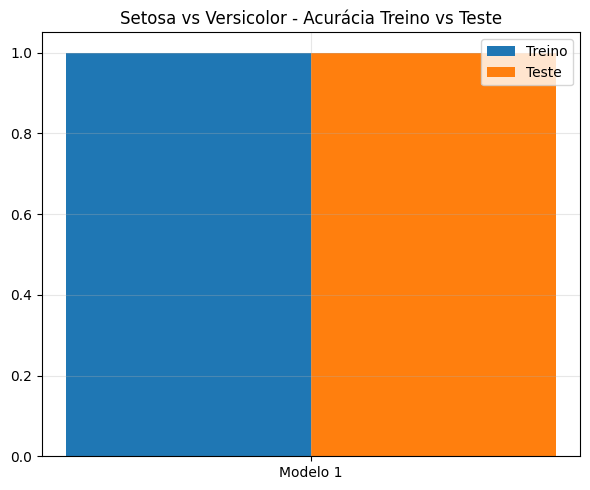

In [ ]:
#@title { vertical-output: true}

mask_0_1 = y <= 1
X_01, y_01 = X[mask_0_1], y[mask_0_1]
X_train, y_train, X_test, y_test = split_manual(X_01, y_01, classes=[0, 1], n_train=30, n_test=20)
resultados = avaliar_modelos(X_train, X_test, y_train, y_test, "Setosa vs Versicolor")
plottar_graficos(resultados, "Setosa vs Versicolor")

## **Caso 2 - Versicolor vs Virginica (Treino: 30 | Teste: 20)**

Versicolor vs Virginica - Treino: 0.983, Teste: 0.875, Diferença: 0.108
N. Árvores: 50, Profundidade: 3, N. Amostras nas folhas: 2, Random state: 42


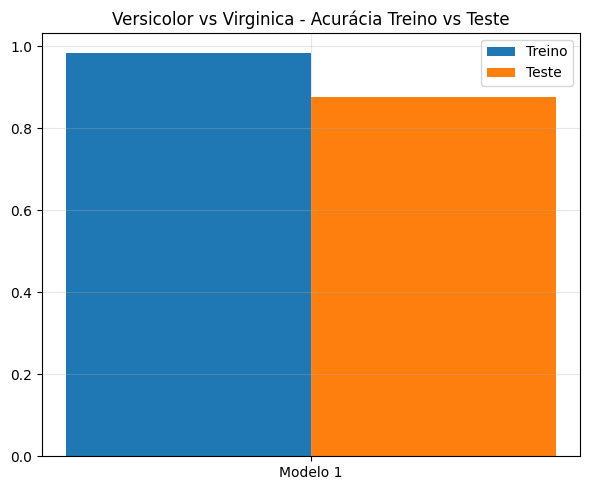

In [ ]:
#@title { vertical-output: true}

mask_1_2 = y >= 1
X_12, y_12 = X[mask_1_2], y[mask_1_2] - 1  # reindexar para 0 e 1
X_train, y_train, X_test, y_test = split_manual(X_12, y_12, classes=[0, 1], n_train=30, n_test=20)
resultados = avaliar_modelos(X_train, X_test, y_train, y_test, "Versicolor vs Virginica")
plottar_graficos(resultados, "Versicolor vs Virginica")

## **Caso 3 - Multiclasse (Treino: 30 | Teste: 20)**

Multiclasse (3 classes) - Treino: 0.978, Teste: 0.933, Diferença: 0.044
N. Árvores: 50, Profundidade: 3, N. Amostras nas folhas: 2, Random state: 42


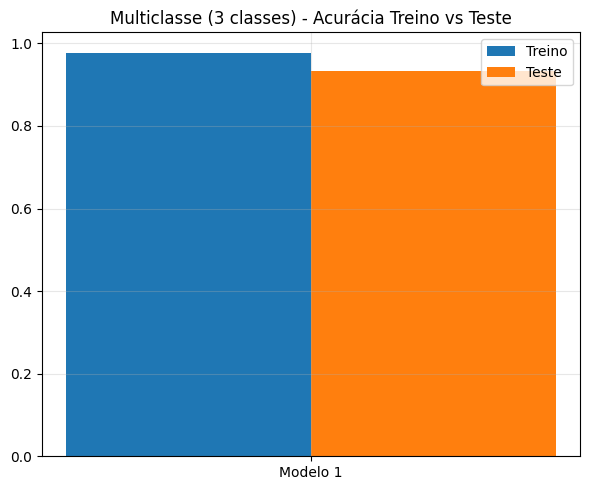

In [ ]:
#@title { vertical-output: true}

X_train, y_train, X_test, y_test = split_manual(X, y, classes=[0, 1, 2], n_train=30, n_test=20)
resultados = avaliar_modelos(X_train, X_test, y_train, y_test, "Multiclasse (3 classes)")
plottar_graficos(resultados, "Multiclasse (3 classes)")